<a href="https://colab.research.google.com/github/davidperezaponte/OIBSIP/blob/main/Project1/T1_iris_flower_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploratory Data Analisis

In [ ]:
# Import modules
!pip install opendatasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import opendatasets as od

import sklearn as sk
from sklearn.model_selection import train_test_split

In [ ]:
# Download of dataset

dataset_link = "https://www.kaggle.com/datasets/saurabh00007/iriscsv"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: davidperez043
Your Kaggle Key: ··········


100%|██████████| 1.28k/1.28k [00:00<00:00, 803kB/s]

In [ ]:
# Identify the files in the directory
import os
os.chdir("iriscsv")
os.listdir()

['Iris.csv']

In [ ]:
# Load of dataset
df = pd.read_csv("Iris.csv")
df.head()


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check the number of registers
df.shape

(150, 6)

In [ ]:
# Types of the atributes
df.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
# Centrality and deviation measure for numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [ ]:
# Verifcation of null values
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<ipython-input-10-3889f1d4e04c>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, linewidths= 5, vmin=-1, vmax=1,cmap=sns.diverging_palette(30, 30, l=85, center="dark", as_cmap=True))


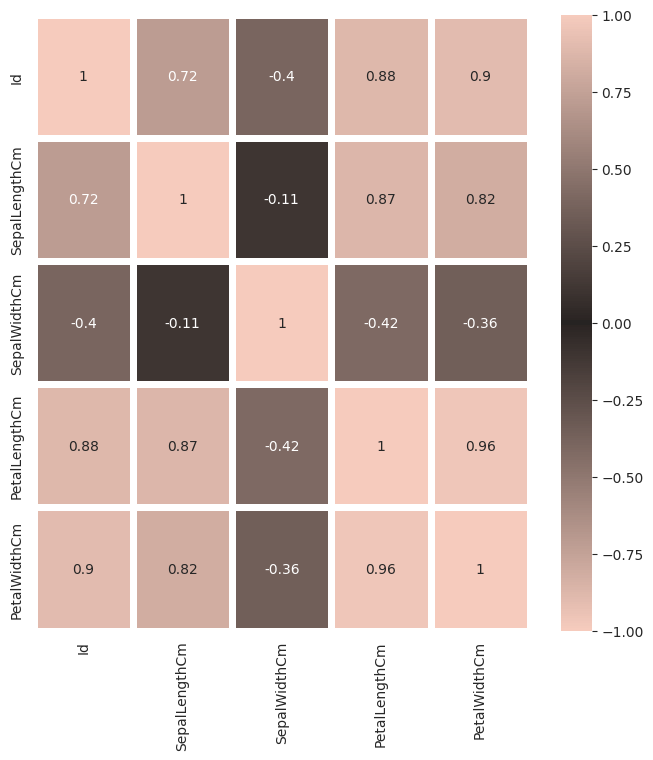

In [ ]:
# Correlation

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(df.corr(), annot=True, linewidths= 5, vmin=-1, vmax=1,cmap=sns.diverging_palette(30, 30, l=85, center="dark", as_cmap=True))

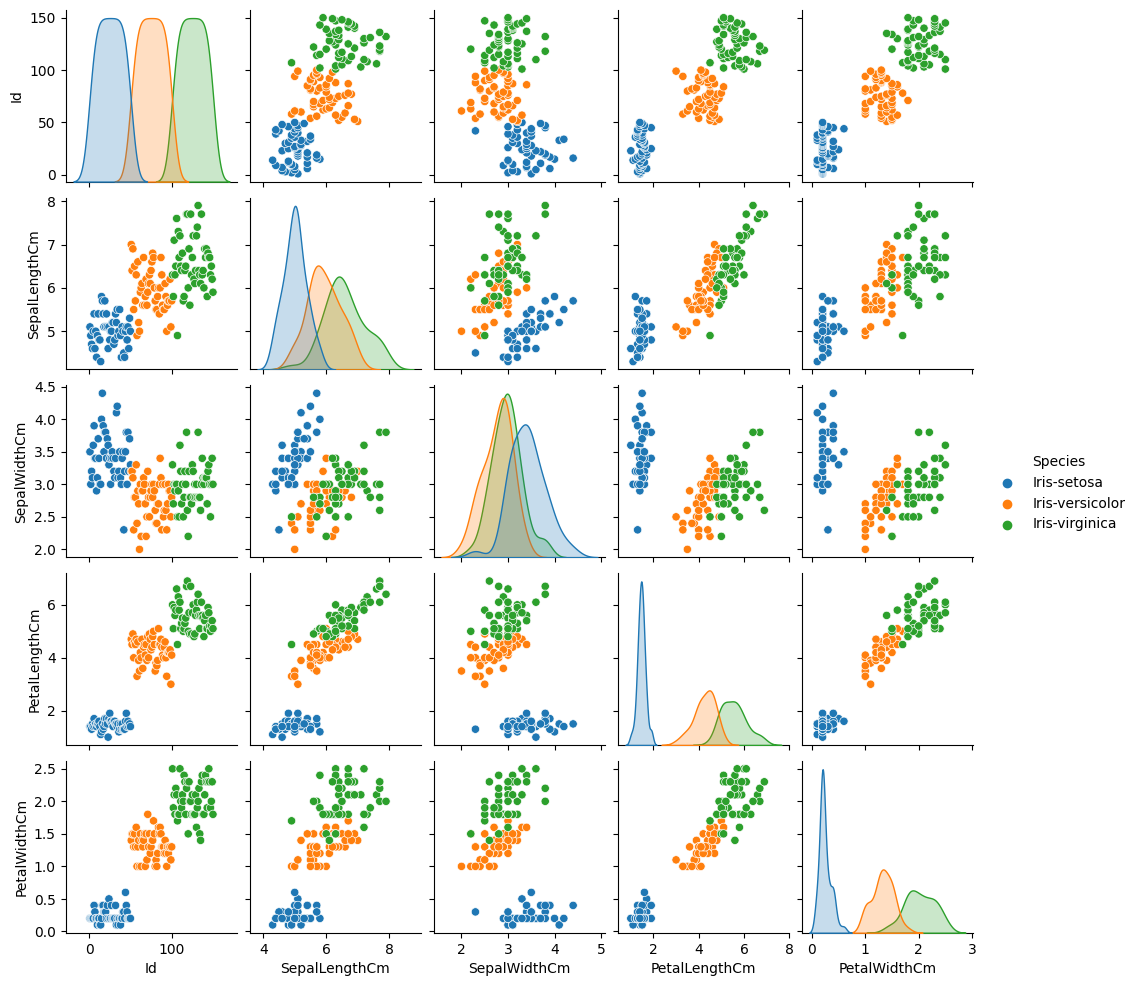

In [ ]:
sns.pairplot(data=df,hue='Species', height=2)

In [ ]:
# Display de number of samples for each class
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
# Split the data set into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                        df.drop(columns = "Species"),
                                        df['Species'],
                                        test_size=0.30,
                                        random_state = 123
                                    )

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(105, 5) (105,)
(45, 5) (45,)


## Logistic Regression Model

In [ ]:
# Training the classification model by logistic regression
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver="lbfgs", max_iter=500, tol=0.01)
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=500, tol=0.01)

In [ ]:
# Application of the model to the test data
predictions = logisticRegr.predict(X_test)
predictions

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

In [ ]:
# Accuracy calculation to evaluate the performance of the model on the test data
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

1.0

## Random Forest Model

In [ ]:
# training the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
# Predictions
predictions_rf = clf.predict(X = X_test)
predictions_rf

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica'], dtype=object)

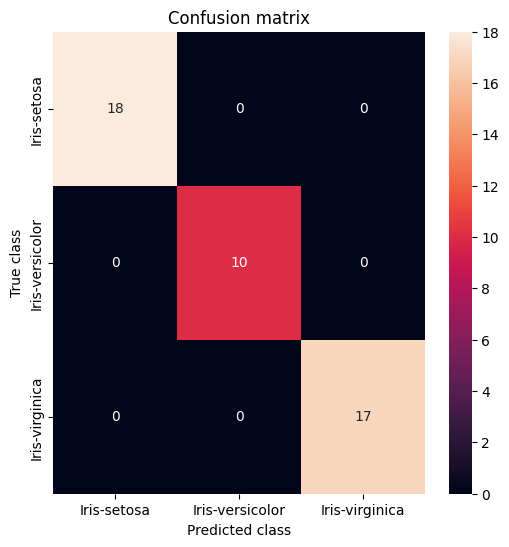

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        18
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        17

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



In [ ]:
#Confusin Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

class_names=pd.unique(df['Species'])
conf_matrix = confusion_matrix(y_test, predictions_rf)

plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, xticklabels=class_names, yticklabels=class_names, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()
print(classification_report(y_test, predictions_rf))